# Лабораторная работа  №2. Предварительная обработка данных


Вариант 7 

Выполнил: Брызгалов Андрей Геннадьевич  
Группа: 19-ИВТ-2

Цель лабораторной работы – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.

### Ход работы:

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


cam = pd.read_csv('camera_dataset.csv', delimiter = ',')
cam

,Model,Release date,Max_resolution,Low_resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal_focus_range,Macro_focus_range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [2]:
cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max_resolution           1038 non-null   float64
 3   Low_resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal_focus_range       1038 non-null   float64
 8   Macro_focus_range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [3]:
cam.head()


,Model,Release date,Max_resolution,Low_resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal_focus_range,Macro_focus_range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [4]:
cam.tail()

,Model,Release date,Max_resolution,Low_resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal_focus_range,Macro_focus_range,Storage included,Weight (inc. batteries),Dimensions,Price
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0
1037,Toshiba PDR-T10,2002,1600.0,800.0,1.0,38.0,38.0,40.0,20.0,8.0,180.0,86.0,129.0


In [5]:
cam.describe()

,Release date,Max_resolution,Low_resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal_focus_range,Macro_focus_range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [6]:
cam.drop_duplicates()

,Model,Release date,Max_resolution,Low_resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal_focus_range,Macro_focus_range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [7]:
cam.shape

(1038, 13)

<AxesSubplot:>

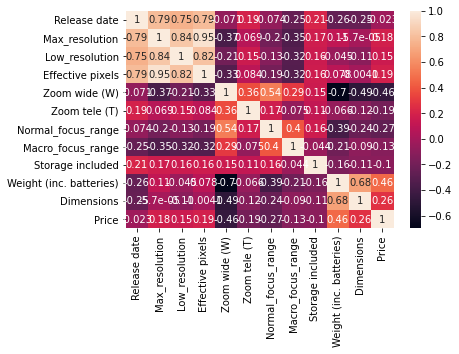

In [9]:
sns.heatmap(cam.corr(),annot=True)#функция для отображения коэффициента корреляции

In [10]:
#корреляция Пирсона
a = cam['Price']
b = cam['Max_resolution']
stats.pearsonr(a, b)

(0.1832024591068465, 2.752833076825844e-09)

In [11]:
stats.spearmanr(cam['Price'], cam['Max_resolution'])

SpearmanrResult(correlation=0.10126852664923244, pvalue=0.0010863948570554284)

<AxesSubplot:>

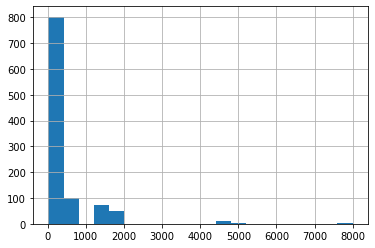

In [12]:
cam.Price.hist(bins=20)

<AxesSubplot:>

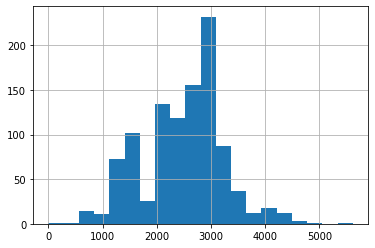

In [13]:
cam.Max_resolution.hist(bins = 20)

In [14]:
def lastname(name):
    return name.split(' ')[0].strip()
company = cam['Model'].apply(lastname)
cam['Company'] = company
cam.head()

,Model,Release date,Max_resolution,Low_resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal_focus_range,Macro_focus_range,Storage included,Weight (inc. batteries),Dimensions,Price,Company
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,Agfa
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,Agfa
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,Agfa
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,Agfa
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,Agfa


In [15]:
cam.Company.value_counts().head(1)

Olympus    122
Name: Company, dtype: int64

In [16]:
cam['N*M'] = cam['Normal_focus_range'] * cam['Macro_focus_range']
cam

,Model,Release date,Max_resolution,Low_resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal_focus_range,Macro_focus_range,Storage included,Weight (inc. batteries),Dimensions,Price,Company,N*M
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,Agfa,2800.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,Agfa,0.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,Agfa,0.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,Agfa,0.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,Agfa,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0,Toshiba,100.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0,Toshiba,720.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0,Toshiba,800.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0,Toshiba,800.0


In [19]:
price = pd.DataFrame(cam.groupby(['Release date'])['Company'].sum())
price =pd.DataFrame(price['Company'].str.count('[A-Z]'))
price.sort_values(by = ['Release date'], ascending = False).head(1)



,Company
Release date,
2007,170


In [20]:
price3['average'] = price3['Price']/price3['count']
price3 = price3.reset_index()
price3

NameError: name 'price3' is not defined

In [ ]:
price3 = price3.rename(columns={'Release date': 'Release_date'})
plt.plot(price3["Release_date"], price3["average"])

In [ ]:
price=pd.DataFrame(cameras.groupby(['Price']))
price.head(1)

In [ ]:
price.tail(1)